# Linear Regression, Logistic Regression, and the Softmax function

Author: Sahngyoon Rhee

Linear and Logistic regressions are fundamental to building neural networks and one of the simplest machine learning models we can impliment. Using a synthetic dataset, we shall impliment both using `sklearn` package.

## Linear Regression

Given a data consisting of points $( x^{(i)}, y^{(i)} )$, we make a best line-of-fit to the data, i.e. we determine the coefficients $\theta_0, \theta_1$ for the line $y = \theta_0x + \theta_1$ that minimizes the mean squared error between the datapoints and the line.

Mean Squared Error: 2.0084008911477094
R^2 Score: 0.6483116688058113


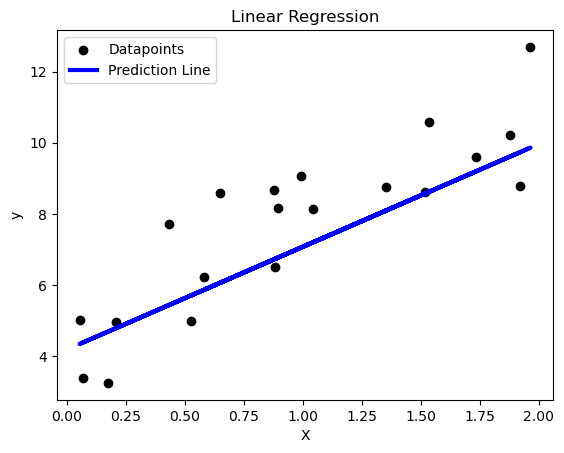

In [1]:
# import necessary library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate a synthetic dataset
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evalute the model, using the MSE and R squared metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X_test, y_test, color = 'black', label = "Datapoints")
plt.plot(X_test, y_pred, color = 'blue', linewidth = 3, label = "Prediction Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()

# Logistic Regression

We use the `iris` dataset from the `sklearn` package and impliment logistic regression. Here, we use the `sklearn` package's `LogisticRegression` method to find the best $\gamma_0, \gamma_1$ that best predicts whether a flower is Iris-Setosa or not, according to the model $g(x) = \frac{1}{1 + e^{\gamma_1x + \gamma_0}}.$

We first explore our dataset that we shall use, which is the `iris` dataset provided by the `sklearn.datsets` modules. According to its wikipedia explanation, "the dataset contains a set of 150 records under five attributes: sepal length, sepal width, petal length, petal width and species." Each iris in the dataset are classified as one of the three types of iris: Iris-setosa, Iris-versicolor, or Iris-virginica. You can read more about the dataset in its [documentation](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [2]:
# import necessary packages
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()

# dimension of the predictor variable
print(f"The number of features in the iris dataset is {iris.data.shape[1]}. ")
# The number of dataset that we have
print(f"The number of datapoints we have in the iris dataset is {iris.data.shape[0]}. ")

The number of features in the iris dataset is 4. 
The number of datapoints we have in the iris dataset is 150. 


We shall use the sepal length and width, the first two features of the dataset, to make a binary classification on whether a flower belongs to the setosa class or not.

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



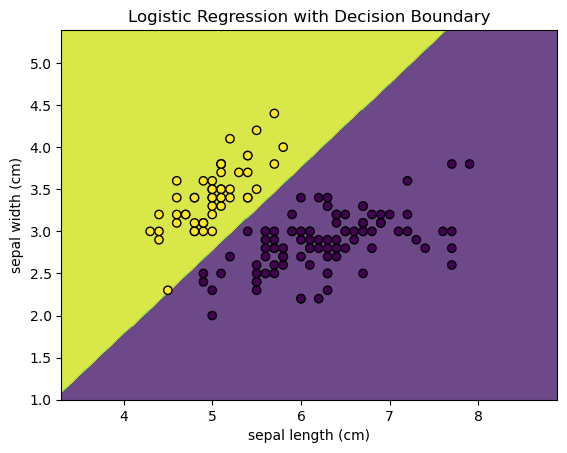

In [3]:
# Define the predictor and target variables
# Uses only the first two features for predictions (in order to be able to visualize result later)
X = iris.data[:, :2]
# target variable as whether a flower beongs to the Setosa class or not
y = (iris.target == 0).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Visualize the result, after making appropriate window for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Logistic Regression with Decision Boundary")
plt.show()

That we have a perfect accuracy score for the classification means that the logistic regression was 100% accurate in its prediction; this is not always possible in many real-life datasets, as there may not be a line that perfectly separates two classes of a given dataset.

# Softmax Regression

Logistic regression can be used for binary classification, i.e. when we have only two classes for a categorical target variable. In general, if we have $k$ possibly overlapping classes as target categories, such as `(truck, car, airplane, jet, furniture, cabinet, desk)`, we can apply logistic regression to get a possibly-overlapping-multiclass-clasification by making the target variable as a $k$ dimensional vector and then applying logistic regression for each entry.

Softmax Regression allows us to generalize logistic regression for the purpose of non-overlapping multiclass classification. The softmax function $g(z)$ takes an array-like input $z = (x_1, x_2, \dots, x_n)$ and outputs the vector $$g(z) = (\frac{e^{x_1}}{\displaystyle\sum_j e^{x_j}}, \dots, \frac{e^{x_n}}{\displaystyle\sum_j e^{x_j}}).$$ We can see that all entries of $g(z)$ sums up to $1$, so that this is a viable candidate for expressing how likely a datapoint belongs to each category. In our Python implimentation, we multiply the numerator and denominator of each entries of $g(z)$ by $e^{-\max_i x_i}$ so that we don't run into the issue of overflow if any of $x_i$s are too big.

In [4]:
import numpy as np

def softmax(z):
    """
    Compute the softmax of vector z.
    """
    exp_z = np.exp(z - np.max(z))  # Subtracting max(z) for numerical stability
    return exp_z / exp_z.sum(axis=0)

# Example usage of the softmax function; we round the numbers for better readability
z = np.array([1.5, 6.0, 2.0, 5.0])
softmax_values = np.round(softmax(z), 3)
print("Softmax values:", softmax_values)


Softmax values: [0.008 0.716 0.013 0.263]


We now impliment the softmax function to our `iris` dataset again, this time going for multiclass classification. Again, we use only the first two features so that we can visualize the result. the `LogisticRegression` will impliment the softmax method for us at the backend.

Accuracy: 0.87


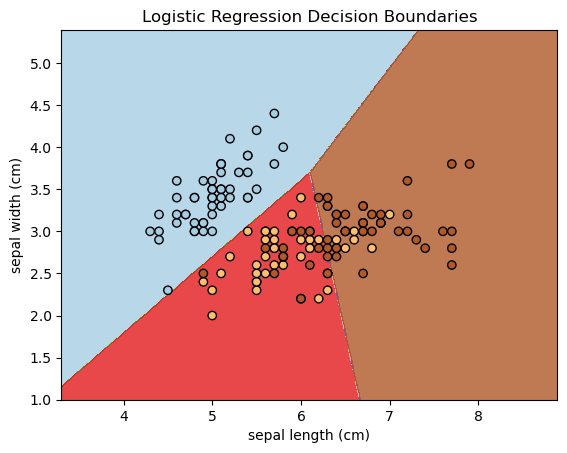

In [5]:
# Define the predictor and target variables
X = iris.data[:, :2]
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a logistic regression model; 'multinomial' signifies the use of softmax function
model = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Logistic Regression Decision Boundaries')
plt.show()